In [1]:
!pip install --upgrade pandas-datareader

In [2]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

start = "2010-01-01"
end = "2019-12-31"
symbol = "NVDA"

df = yf.download(symbol, start=start, end=end)
print(df.head())




[*********************100%%**********************]  1 of 1 completed
              Open   High     Low   Close  Adj Close    Volume
Date                                                          
2010-01-04  4.6275  4.655  4.5275  4.6225   4.240801  80020400
2010-01-05  4.6050  4.740  4.6050  4.6900   4.302728  72864800
2010-01-06  4.6875  4.730  4.6425  4.7200   4.330250  64916800
2010-01-07  4.6950  4.715  4.5925  4.6275   4.245389  54779200
2010-01-08  4.5900  4.670  4.5625  4.6375   4.254564  47816800


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,60.130001,60.452499,59.597500,59.705002,59.477837,35506000
2019-12-24,59.549999,59.827499,59.205002,59.654999,59.428017,13886400
2019-12-26,59.689999,60.080002,59.500000,59.797501,59.569977,18285200
2019-12-27,59.950001,60.084999,58.952499,59.217499,58.992188,25464400
2019-12-30,58.997501,59.049999,57.764999,58.080002,57.859009,25805600


In [4]:
df =df.reset_index ()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,4.6275,4.655,4.5275,4.6225,4.240801,80020400
1,2010-01-05,4.6050,4.740,4.6050,4.6900,4.302728,72864800
2,2010-01-06,4.6875,4.730,4.6425,4.7200,4.330250,64916800
3,2010-01-07,4.6950,4.715,4.5925,4.6275,4.245389,54779200
4,2010-01-08,4.5900,4.670,4.5625,4.6375,4.254564,47816800


In [5]:
df =df.drop(["Date", "Adj Close"], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,4.6275,4.655,4.5275,4.6225,80020400
1,4.6050,4.740,4.6050,4.6900,72864800
2,4.6875,4.730,4.6425,4.7200,64916800
3,4.6950,4.715,4.5925,4.6275,54779200
4,4.5900,4.670,4.5625,4.6375,47816800


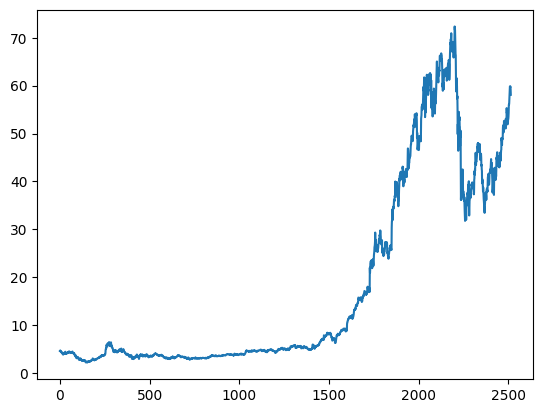

In [6]:
plt.plot(df["Close"])

In [7]:
df


,Open,High,Low,Close,Volume
0,4.627500,4.655000,4.527500,4.622500,80020400
1,4.605000,4.740000,4.605000,4.690000,72864800
2,4.687500,4.730000,4.642500,4.720000,64916800
3,4.695000,4.715000,4.592500,4.627500,54779200
4,4.590000,4.670000,4.562500,4.637500,47816800
...,...,...,...,...,...
2510,60.130001,60.452499,59.597500,59.705002,35506000
2511,59.549999,59.827499,59.205002,59.654999,13886400
2512,59.689999,60.080002,59.500000,59.797501,18285200
2513,59.950001,60.084999,58.952499,59.217499,25464400


In [8]:
ma100 =df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    47.604425
2511    47.798000
2512    48.019000
2513    48.230300
2514    48.426375
Name: Close, Length: 2515, dtype: float64

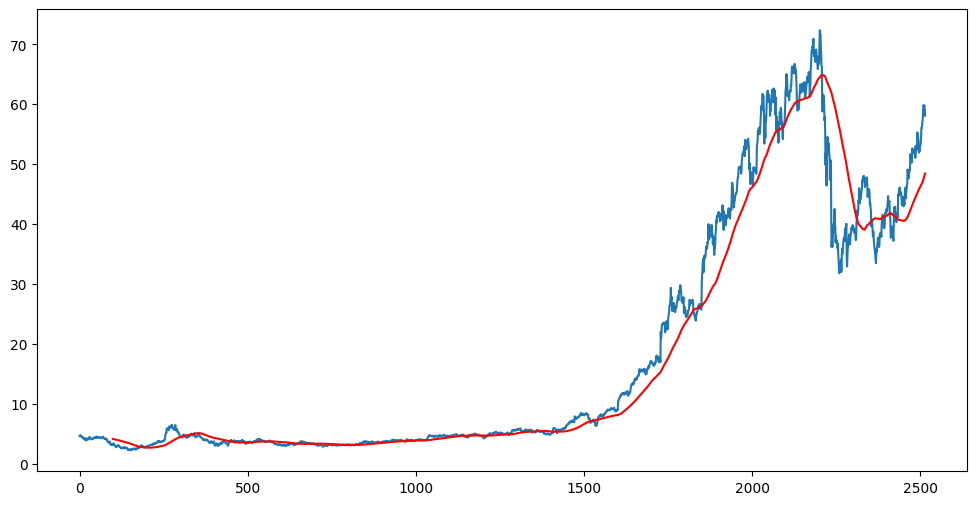

In [9]:
plt.figure(figsize =(12,6))
plt.plot (df.Close)
plt.plot (ma100,'r' )

In [10]:
ma200 =df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    44.719575
2511    44.814700
2512    44.902912
2513    44.992050
2514    45.070187
Name: Close, Length: 2515, dtype: float64

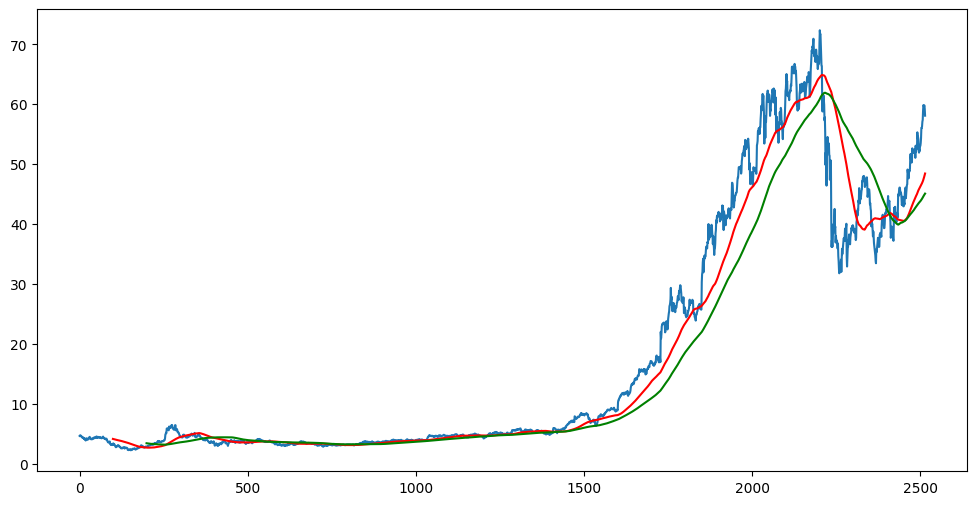

In [11]:
plt.figure(figsize =(12,6))
plt.plot (df.Close)
plt.plot (ma100,'r' )
plt.plot (ma200,'g' )

In [12]:
df.shape

(2515, 5)

In [13]:
#Sptitting Dota tnto Training and Testing
data_training =pd.DataFrame(df[ "Close" ][0: int (len(df)*0.70)])
data_testing =pd.DataFrame (df[ "Close" ][int (len(df)*0.70): int (len(df))])
print (data_training.shape)
print (data_testing.shape)

(1760, 1)
(755, 1)


In [14]:
data_training.head()

,Close
0,4.6225
1,4.6900
2,4.7200
3,4.6275
4,4.6375


In [15]:
data_testing.head()

,Close
1760,27.857500
1761,26.684999
1762,25.502501
1763,26.097500
1764,25.434999


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler(feature_range =(0, 1))
data_training_array =scaler.fit_transform(data_training)
data_training_array

array([[0.08862043],
       [0.09111029],
       [0.09221689],
       ...,
       [0.93046845],
       [1.        ],
       [0.92558097]])

In [17]:
x_train=[]
y_train=[]
for i in range(100, data_training_array.shape[0]) :
         x_train.append ( data_training_array[i-100: i])
         y_train.append (data_training_array[i, 0])
x_train, y_train =np.array (x_train), np.array(y_train)

In [18]:
#ML_MODEL

In [19]:
import tensorflow as tf
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential



# Your existing code
model = Sequential()
model.add(LSTM(units=50, activation="relu", return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation="relu", return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation="relu", return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=60, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 60)                3

In [21]:
tf.compat.v1.train.Optimizer
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit (x=x_train, y=y_train, epochs = 50) 

Epoch 1/50



In [ ]:
model.save('lstm_model.keras')

In [ ]:
x_train =x_train.reshape(1660,100)

x_train.shape

(1660, 100)

In [ ]:
y_train =y_train.reshape(1660,1)

y_train.shape

(1660, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
import pickle
r_sq = model.score(x_train, y_train)
print(f"coefficient of determination: {r_sq}")
pickle.dump(model, open('model.pkl','wb'))

coefficient of determination: 0.9975627308666658


In [ ]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [ ]:
data_testing.tail(100)

,Close
2415,50.857498
2416,50.247501
2417,50.119999
2418,52.242500
2419,50.687500
...,...
2510,71.000000
2511,71.067497
2512,72.477501
2513,72.449997


In [ ]:
past_100_days =data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [ ]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [ ]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [ ]:
input_data.shape

(855, 1)

In [ ]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [ ]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [ ]:
x_test =x_test.reshape(x_test.shape[0],100)
y_test =y_test.reshape(y_test.shape[0],1)

In [ ]:
#Making Predictions
y_ =model.score(x_test,y_test)
y_

0.99260627973872

In [ ]:
y_test

array([[0.0721907 ],
       [0.06736028],
       [0.06911197],
       [0.06842189],
       [0.07155371],
       [0.07845431],
       [0.08418707],
       [0.08482406],
       [0.08822126],
       [0.08556719],
       [0.08445249],
       [0.0895483 ],
       [0.0894952 ],
       [0.0883805 ],
       [0.0895483 ],
       [0.08997296],
       [0.08938906],
       [0.09952758],
       [0.0998461 ],
       [0.09989915],
       [0.09820055],
       [0.09671427],
       [0.1359945 ],
       [0.1348267 ],
       [0.1377462 ],
       [0.144169  ],
       [0.15075112],
       [0.15345824],
       [0.15547536],
       [0.1538829 ],
       [0.16009341],
       [0.16927655],
       [0.17187748],
       [0.17102824],
       [0.17299223],
       [0.17819418],
       [0.18037053],
       [0.1772918 ],
       [0.17798189],
       [0.17941503],
       [0.17973358],
       [0.1945963 ],
       [0.19019062],
       [0.19454325],
       [0.19220766],
       [0.19316316],
       [0.19040291],
       [0.188

In [ ]:
y_

0.99260627973872

In [ ]:
y_predicted=model.predict(x_test)

In [ ]:
scaler.scale_[0]

0.021232550427044028

In [ ]:
scale_factor= 1/(scaler.scale_[0])
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

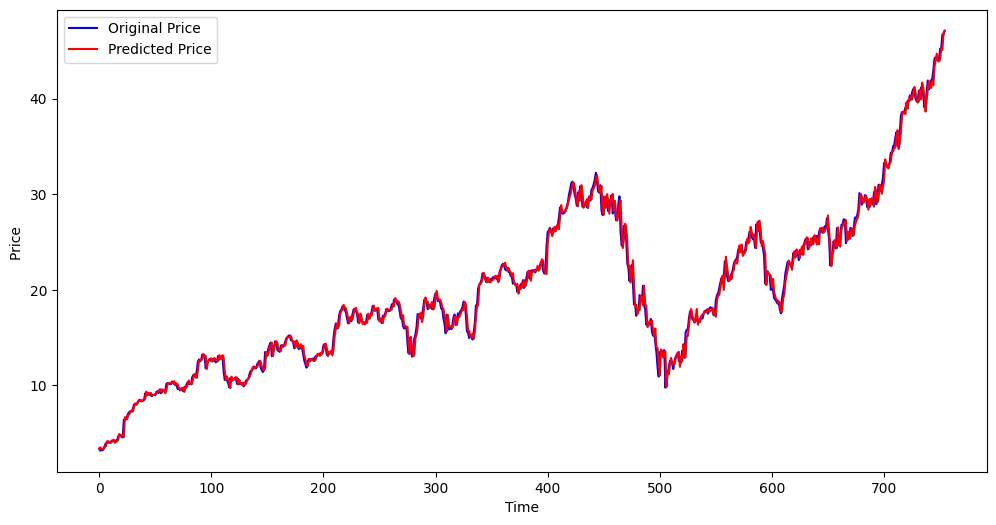

In [ ]:
plt.figure(figsize= (12,6))
plt.plot(y_test, 'b', label="Original Price")
plt.plot(y_predicted, 'r', label="Predicted Price")
plt.xlabel("Time")
plt.ylabel( "Price ")
plt.legend ()
plt.show()